In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size = 32  
img_height = 108 
img_width = 192   

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Project resized",    
  validation_split=0.2,
  subset="training",
  seed=322,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20972 files belonging to 7 classes.
Using 16778 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Project resized",  
  validation_split=0.2,
  subset="validation",
  seed=228,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20972 files belonging to 7 classes.
Using 4194 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Caelid', 'Crumbling Farum Azula', 'Leyndell, Capital of Ash', 'Limgrave', 'Liurnia', 'Mountain of the Giants', 'Round Table Hold']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 108, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 108, 192, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 96, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 96, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 48, 64)        1

In [ ]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
525/525 [==============================] - 1949s 849ms/step - loss: 0.0523 - accuracy: 0.9794 - val_loss: 8.4936e-05 - val_accuracy: 1.0000
Epoch 2/2
525/525 [==============================] - 361s 688ms/step - loss: 5.0721e-05 - accuracy: 1.0000 - val_loss: 2.2178e-05 - val_accuracy: 1.0000


In [ ]:

test_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Final Test/test_og",
  image_size=(img_height, img_width))

class_names = test_ds.class_names
print(class_names)
results = model.evaluate(test_ds, batch_size=128)

Found 175 files belonging to 7 classes.
['Caelid', 'Crumbling Farum Azula', 'Leyndell, Capital of Ash', 'Limgrave', 'Liurnia', 'Mountain of the Giants', 'Round Table Hold']
6/6 [==============================] - 3s 164ms/step - loss: 0.8743 - accuracy: 0.9371


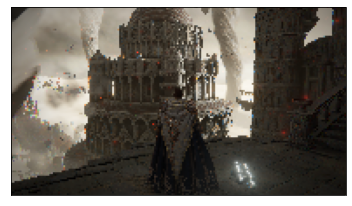

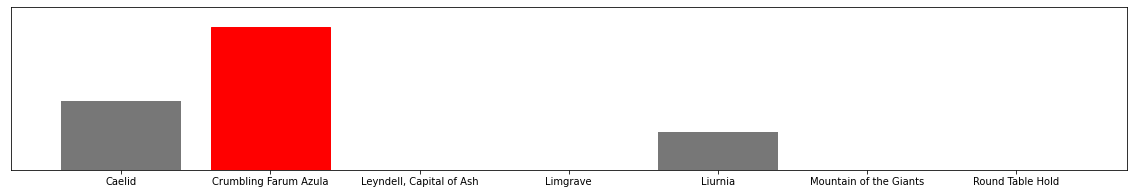

Crumbling Farum Azula


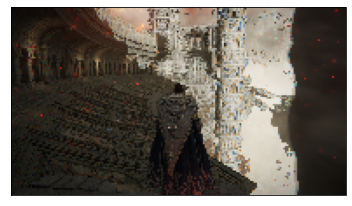

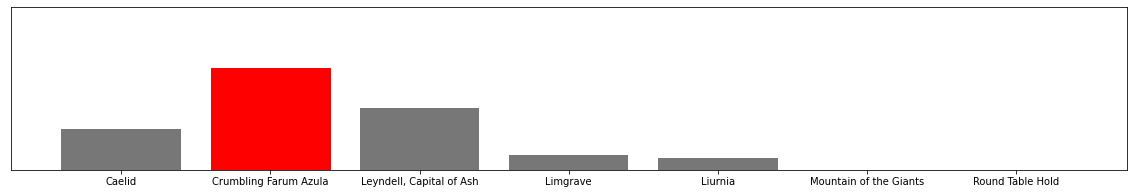

Crumbling Farum Azula


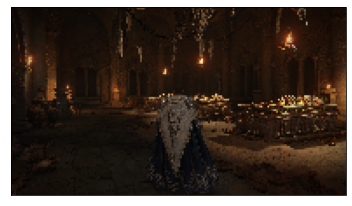

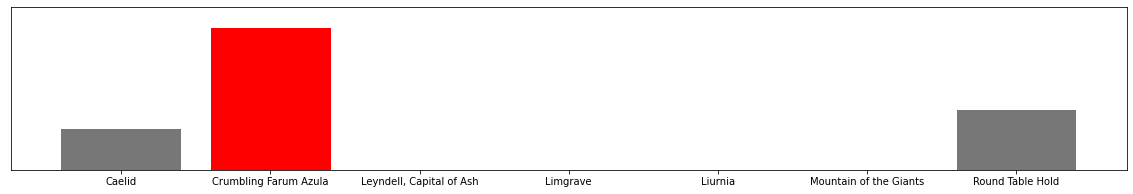

Crumbling Farum Azula


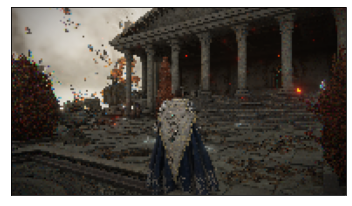

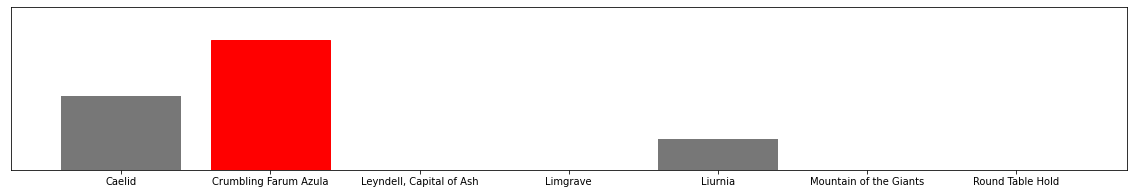

Crumbling Farum Azula


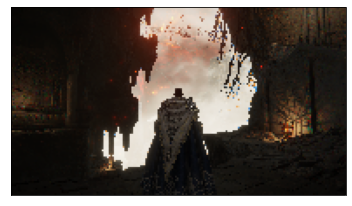

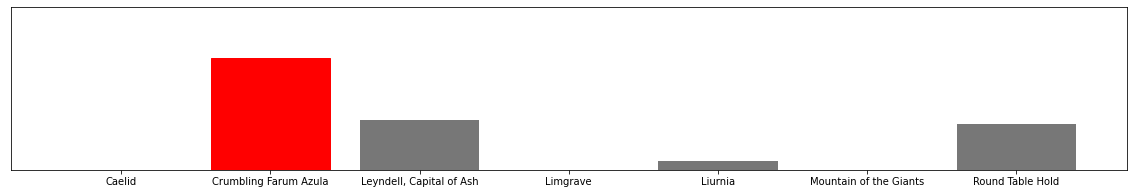

Crumbling Farum Azula


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Crumbling Farum Azula/4_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()


  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])
  

  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])


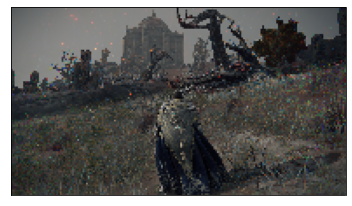

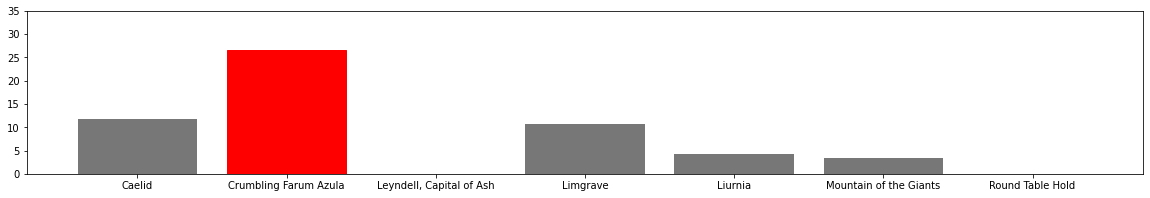

Crumbling Farum Azula


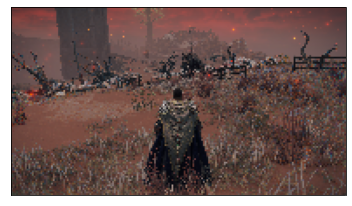

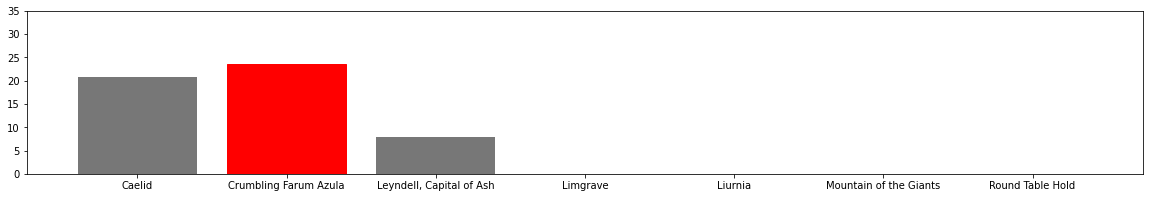

Crumbling Farum Azula


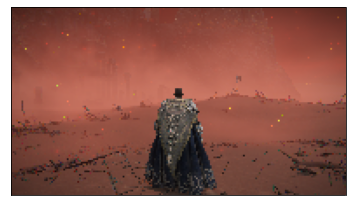

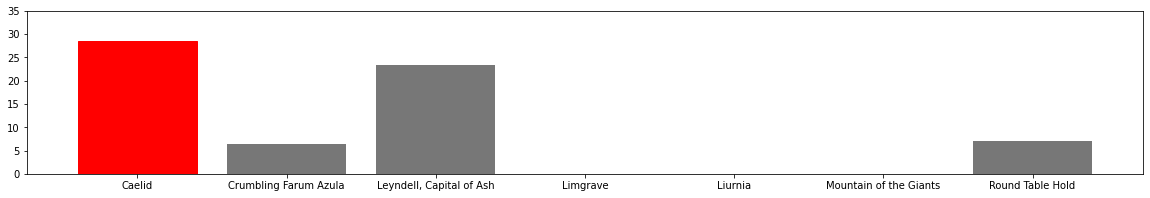

Caelid


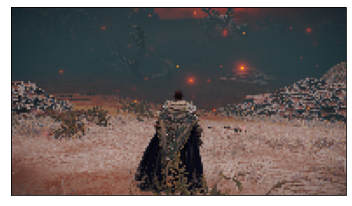

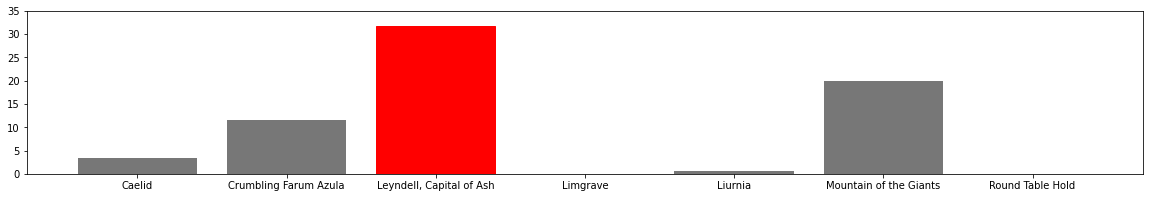

Leyndell, Capital of Ash


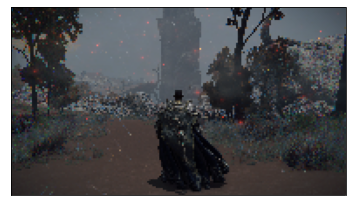

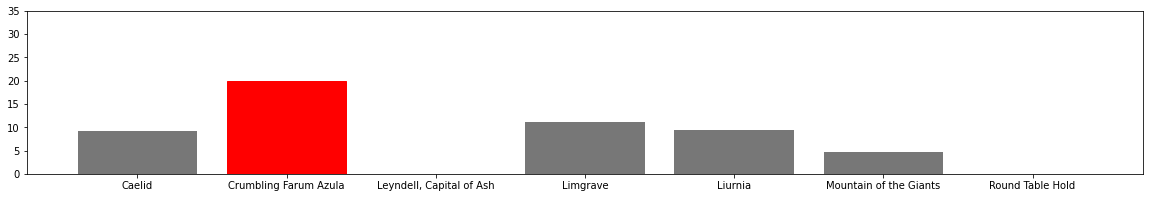

Crumbling Farum Azula


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Caelid/2_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()


  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])


  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])

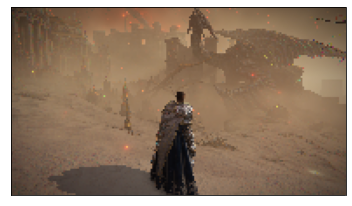

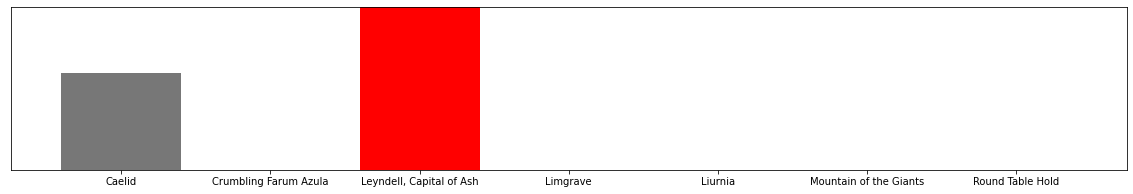

Leyndell, Capital of Ash


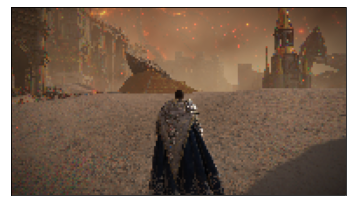

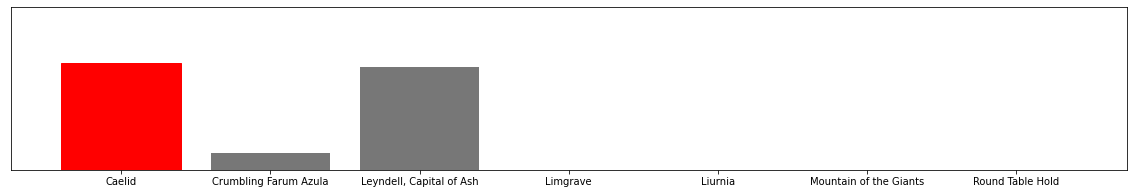

Caelid


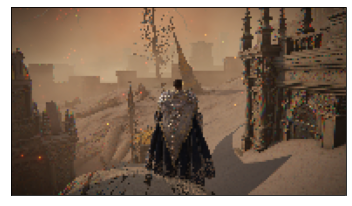

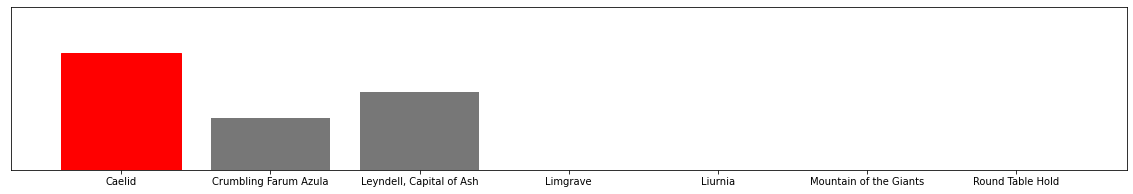

Caelid


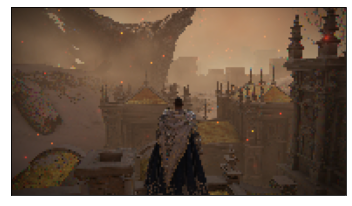

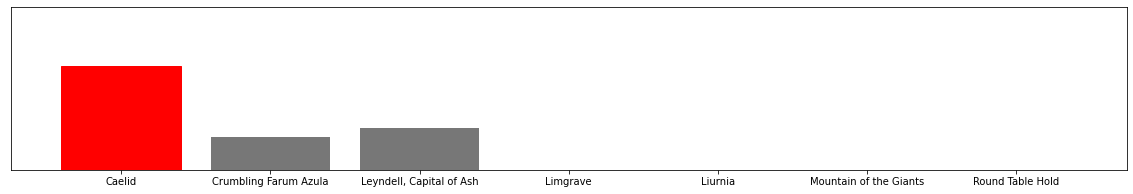

Caelid


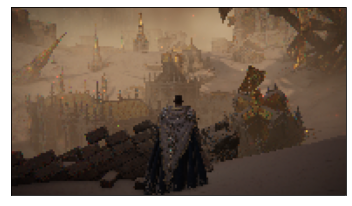

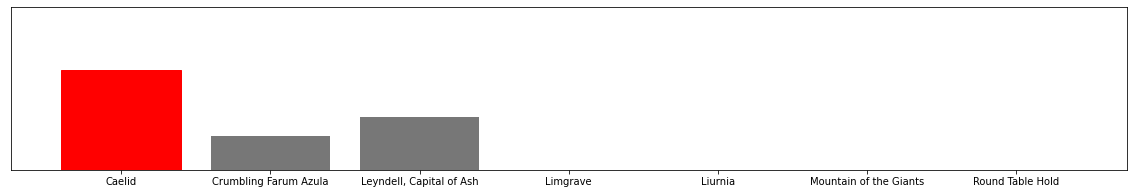

Caelid


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Leyndell, Capital of Ash/3_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()


  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])

  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])

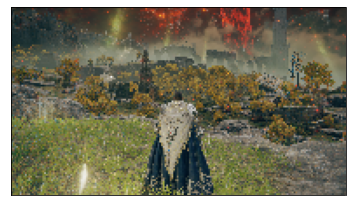

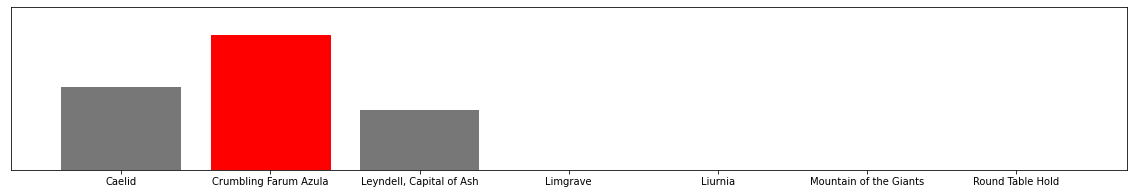

Crumbling Farum Azula


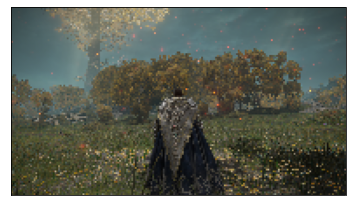

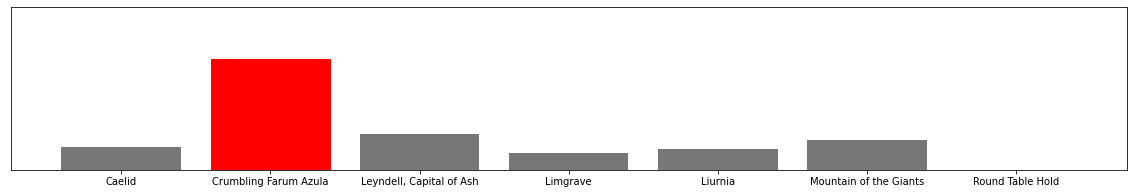

Crumbling Farum Azula


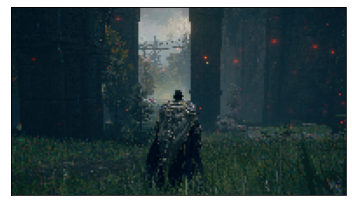

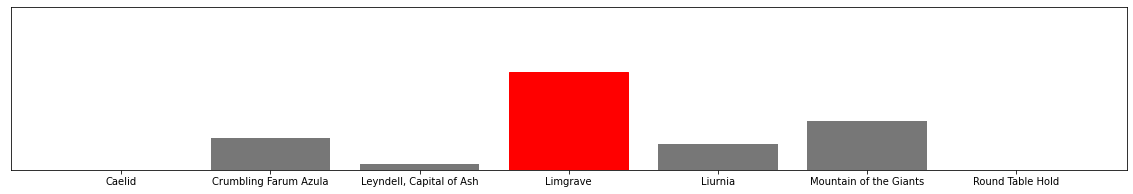

Limgrave


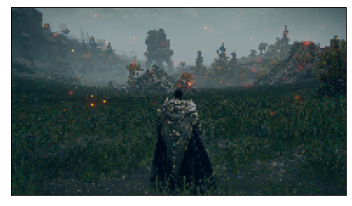

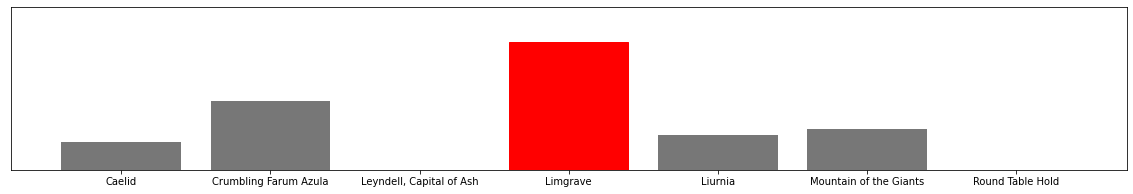

Limgrave


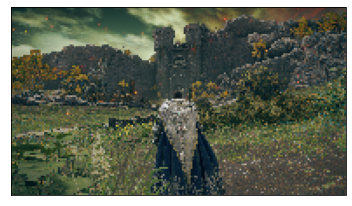

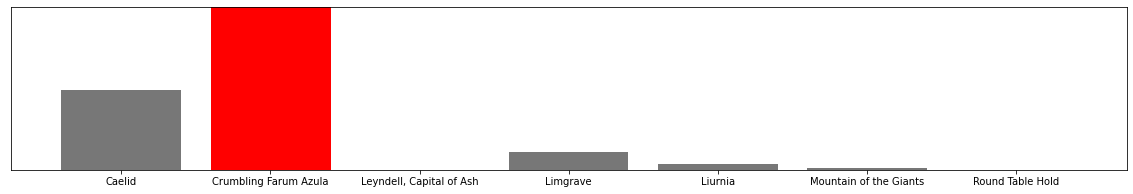

Crumbling Farum Azula


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Limgrave/0_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()

  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])

  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])

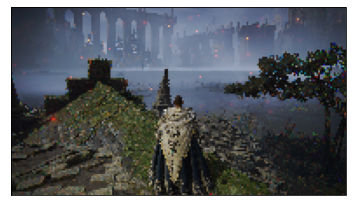

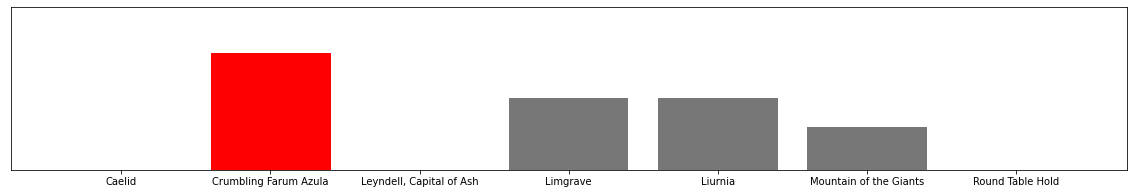

Crumbling Farum Azula


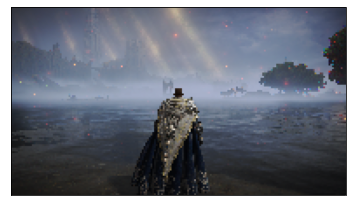

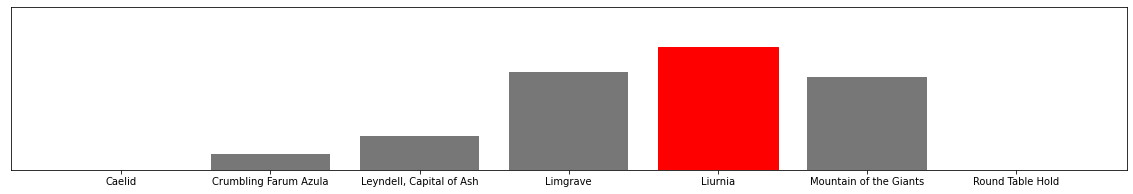

Liurnia


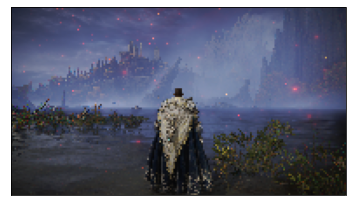

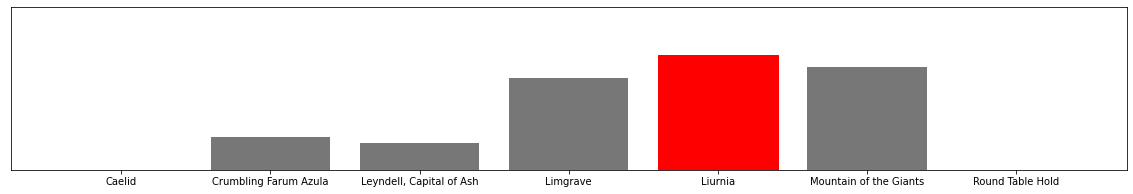

Liurnia


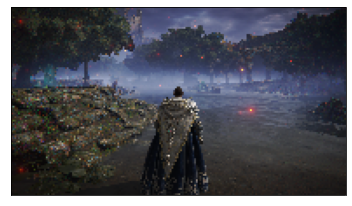

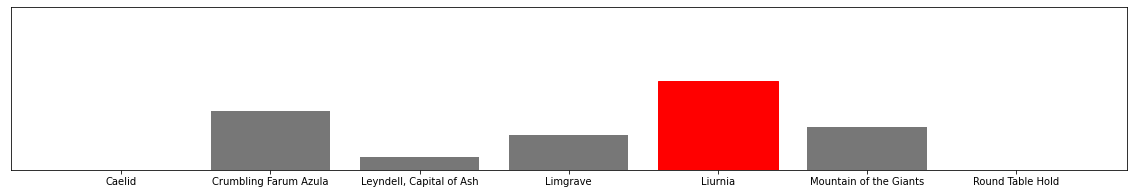

Liurnia


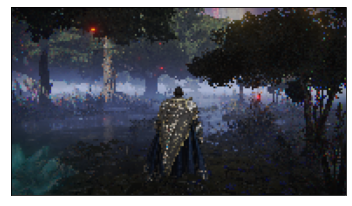

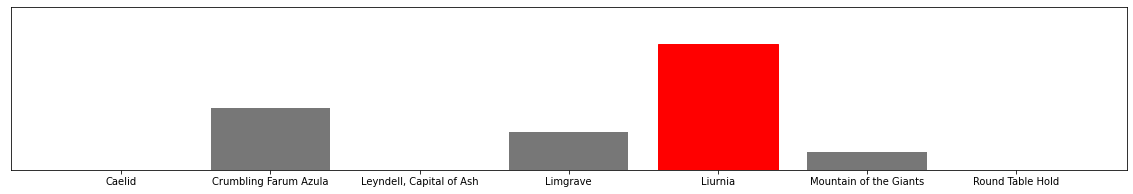

Liurnia


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Liurnia/5_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()


  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])

  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])

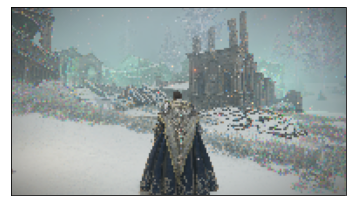

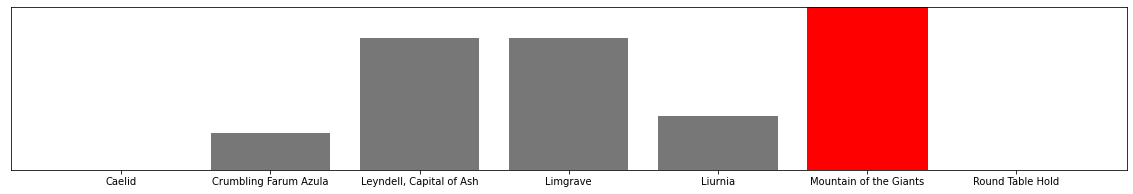

Mountain of the Giants


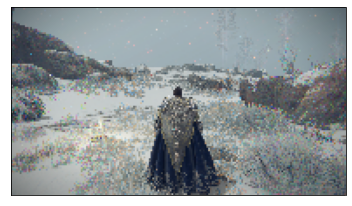

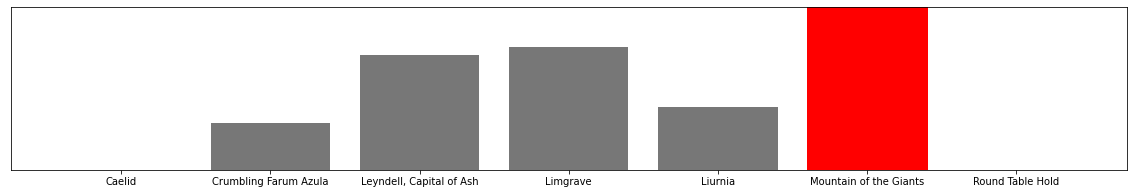

Mountain of the Giants


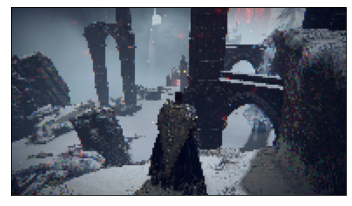

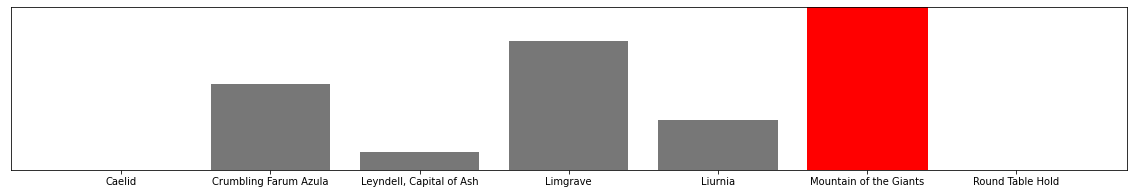

Mountain of the Giants


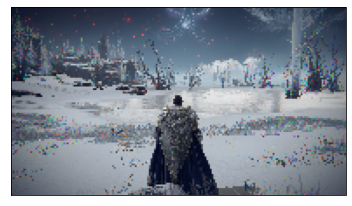

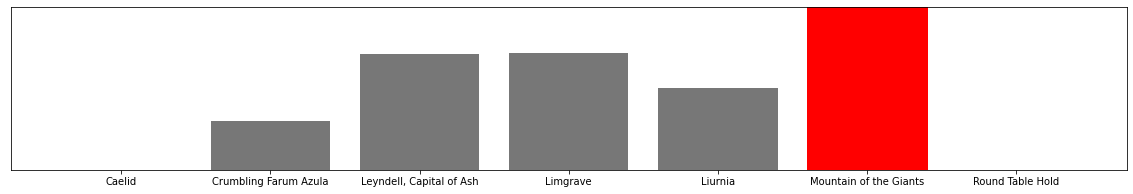

Mountain of the Giants


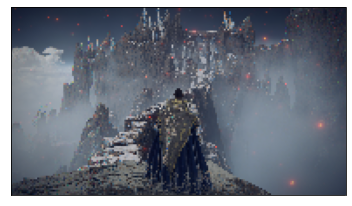

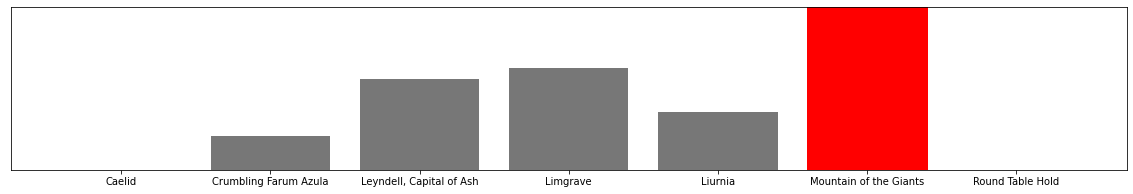

Mountain of the Giants


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Mountain of the Giants/1_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()


  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])

  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])

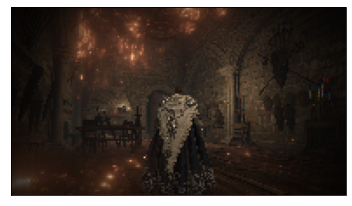

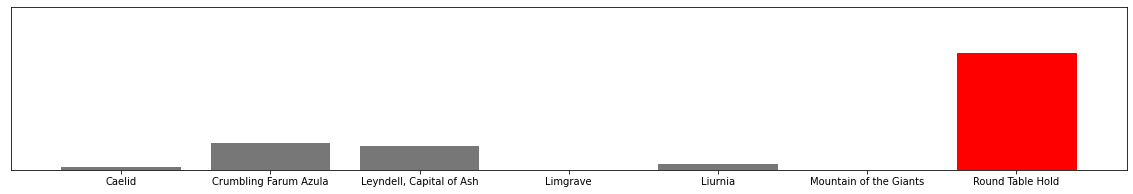

Round Table Hold


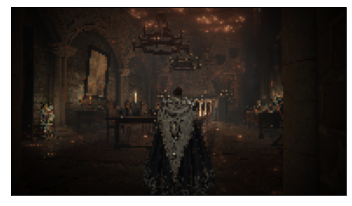

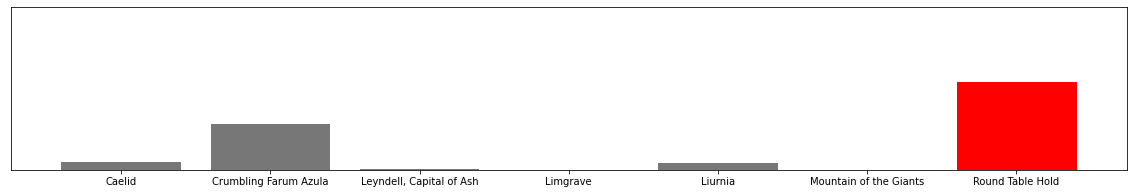

Round Table Hold


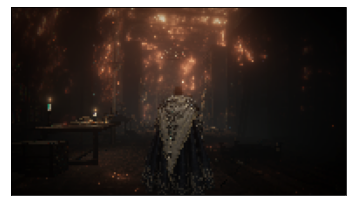

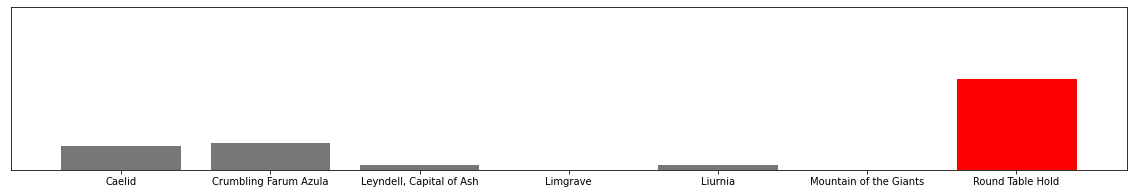

Round Table Hold


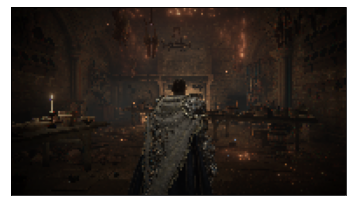

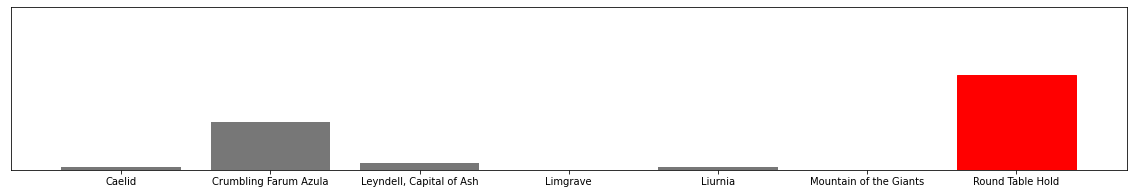

Round Table Hold


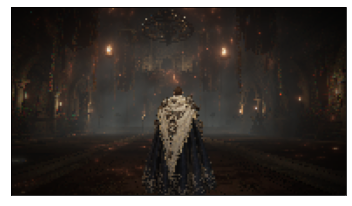

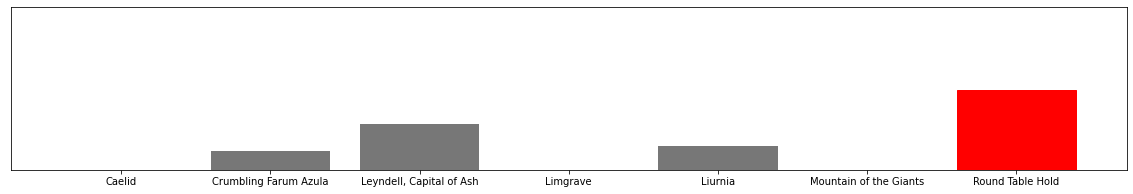

Round Table Hold


In [ ]:
for i in range(5):
  filename="/content/drive/MyDrive/Final Test/test_og/Round Table Hold/6_"+ str(i)+ ".png"
  img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_height,img_width))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.show()


  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.figure(figsize=(20,3))
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(class_names, classes[0], color="#777777")
  plt.ylim([0, 35])

  pr=np.argmax(classes)
  thisplot[pr].set_color('red')
  plt.show()
  print(class_names[pr])